In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('uber_data_india_realistic.csv')
df.head()

,ride_id,customer_id,driver_id,ride_date,ride_time,pickup_location,dropoff_location,distance_km,ride_duration_min,fare_amount,payment_method,customer_rating,driver_rating,cancellation_reason,ride_status,promo_code,vehicle_type,weather_condition,traffic_condition,driver_experience_years
0,R0000001,C00001,D00001,2023-01-03 15:00:00,14:05:41,Kolkata,Bangalore,1871,2463.14,22502.0,Cash,4,2,NaN,Completed,NaN,Mini,Clear,Low,5
1,R0000002,C00002,D00002,2023-01-04 13:00:00,12:26:26,Delhi,Hyderabad,1570,2845.92,22658.0,Card,2,1,NaN,Completed,NaN,Mini,Clear,Medium,8
2,R0000003,C00003,D00003,2023-01-07 02:00:00,03:25:31,Pune,Delhi,1490,2416.70,27942.8,Cash,5,5,NaN,Completed,NaN,SUV,Rainy,Medium,8
3,R0000004,C00004,D00004,2023-01-01 13:00:00,19:43:17,Delhi,Surat,1182,2340.03,14234.0,Cash,3,3,NaN,Completed,NaN,Sedan,Clear,Low,7
4,R0000005,C00005,D00005,2023-01-05 11:00:00,16:35:35,Hyderabad,Surat,983,1189.26,15384.8,Card,1,1,NaN,Completed,NaN,Auto,Rainy,Low,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ride_id                  80000 non-null  object 
 1   customer_id              80000 non-null  object 
 2   driver_id                80000 non-null  object 
 3   ride_date                80000 non-null  object 
 4   ride_time                80000 non-null  object 
 5   pickup_location          80000 non-null  object 
 6   dropoff_location         80000 non-null  object 
 7   distance_km              80000 non-null  int64  
 8   ride_duration_min        80000 non-null  float64
 9   fare_amount              80000 non-null  float64
 10  payment_method           80000 non-null  object 
 11  customer_rating          80000 non-null  int64  
 12  driver_rating            80000 non-null  int64  
 13  cancellation_reason      8044 non-null   object 
 14  ride_status           

In [5]:
df.isnull().sum()

ride_id                        0
customer_id                    0
driver_id                      0
ride_date                      0
ride_time                      0
pickup_location                0
dropoff_location               0
distance_km                    0
ride_duration_min              0
fare_amount                    0
payment_method                 0
customer_rating                0
driver_rating                  0
cancellation_reason        71956
ride_status                    0
promo_code                 64012
vehicle_type                   0
weather_condition              0
traffic_condition              0
driver_experience_years        0
dtype: int64

In [6]:
df['ride_date'] = pd.to_datetime(df['ride_date'])
df['ride_time'] = pd.to_datetime(df['ride_time'], format='%H:%M:%S').dt.time

All dates are valid.
DatetimeIndex(['2023-01-03 15:00:00', '2023-01-04 13:00:00',
               '2023-01-07 02:00:00', '2023-01-01 13:00:00',
               '2023-01-05 11:00:00', '2023-01-02 03:00:00',
               '2023-01-04 01:00:00', '2023-01-04 21:00:00',
               '2023-01-02 08:00:00', '2023-01-07 00:00:00',
               ...
               '2023-01-07 22:00:00', '2023-01-05 12:00:00',
               '2023-01-04 13:00:00', '2023-01-08 15:00:00',
               '2023-01-03 03:00:00', '2023-01-05 18:00:00',
               '2023-01-08 16:00:00', '2023-01-07 14:00:00',
               '2023-01-02 06:00:00', '2023-01-01 17:00:00'],
              dtype='datetime64[ns]', name='ride_date', length=80000, freq=None)
ride_date
2023-01-31    80000
Freq: M, dtype: int64


C:\Users\sinha\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


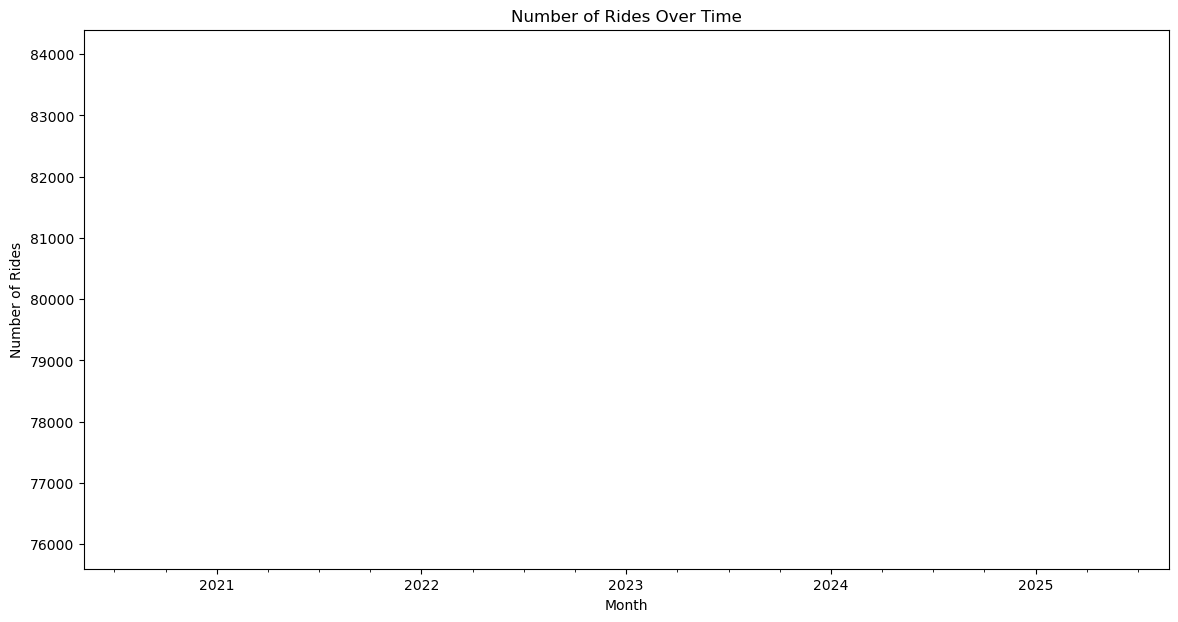

In [7]:
df['ride_date'] = pd.to_datetime(df['ride_date'], errors='coerce')

# Check for any conversion issues
if df['ride_date'].isnull().any():
    print("There are missing or invalid dates in the dataset.")
    print(df[df['ride_date'].isnull()])
else:
    print("All dates are valid.")

# Set 'ride_date' as the index
df.set_index('ride_date', inplace=True)

# Check the index
print(df.index)

# Resample the data by month and count the number of rides
monthly_rides = df.resample('M').size()

# Check the resampled data
print(monthly_rides)

# Plot the number of rides over time
plt.figure(figsize=(14, 7))
monthly_rides.plot()
plt.title('Number of Rides Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()

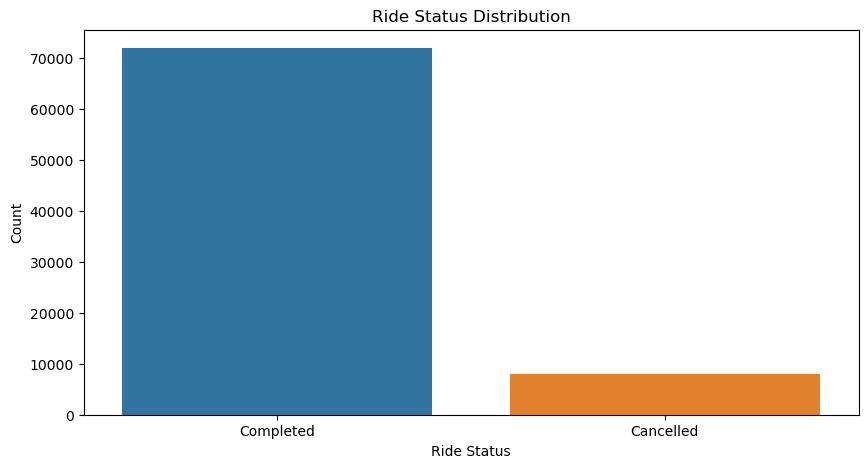

In [9]:
# 2. Ride status distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='ride_status')
plt.title('Ride Status Distribution')
plt.xlabel('Ride Status')
plt.ylabel('Count')
plt.show()

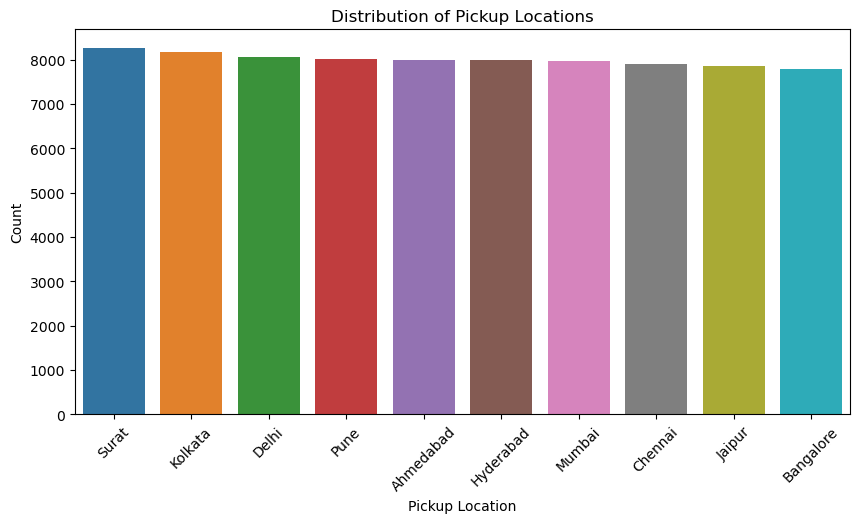

In [11]:
# 3. Distribution of pickup locations
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='pickup_location', order=df['pickup_location'].value_counts().index)
plt.title('Distribution of Pickup Locations')
plt.xlabel('Pickup Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

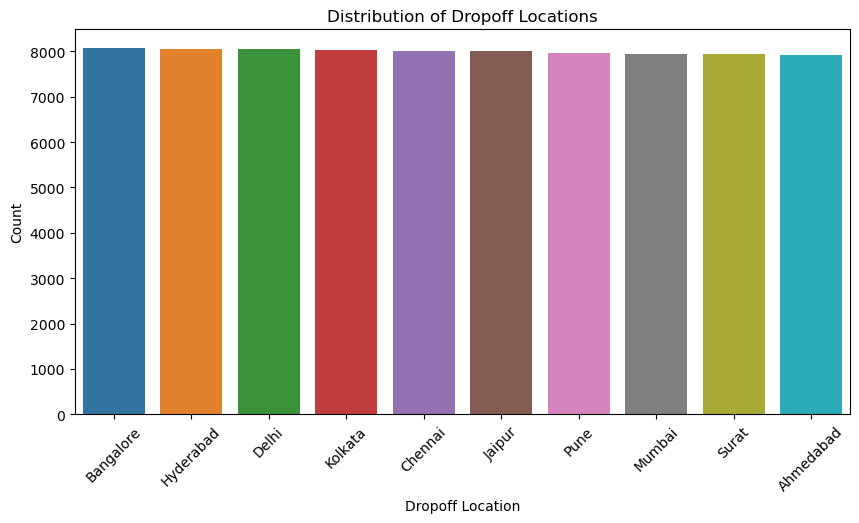

In [12]:
# 4. Distribution of dropoff locations
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='dropoff_location', order=df['dropoff_location'].value_counts().index)
plt.title('Distribution of Dropoff Locations')
plt.xlabel('Dropoff Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

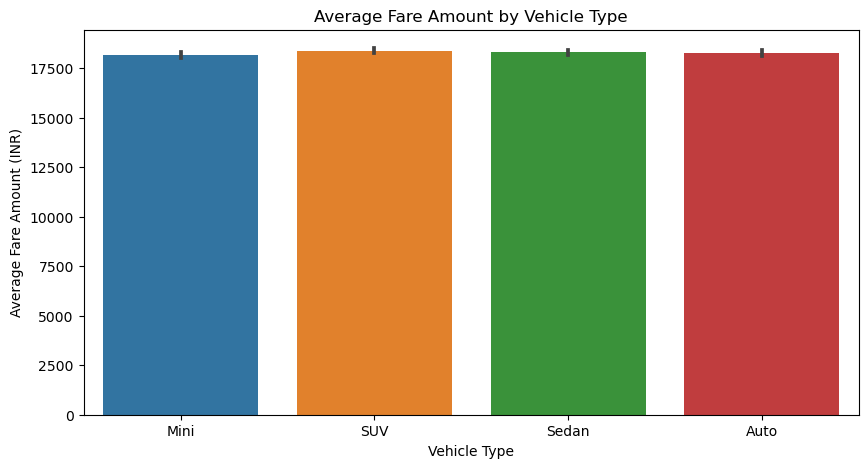

In [13]:
# 5. Average fare amount by vehicle type
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='vehicle_type', y='fare_amount')
plt.title('Average Fare Amount by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Fare Amount (INR)')
plt.show()

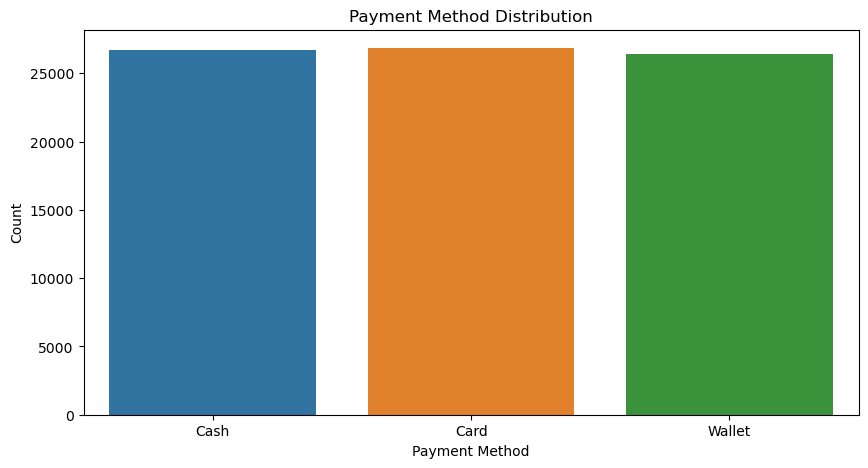

In [14]:
# 6. Payment method distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='payment_method')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

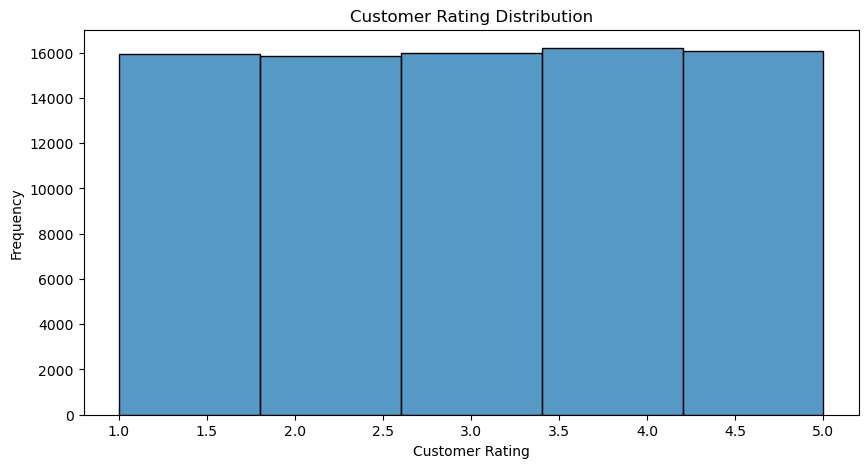

In [15]:
# 7. Customer rating distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['customer_rating'], bins=5, kde=False)
plt.title('Customer Rating Distribution')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.show()

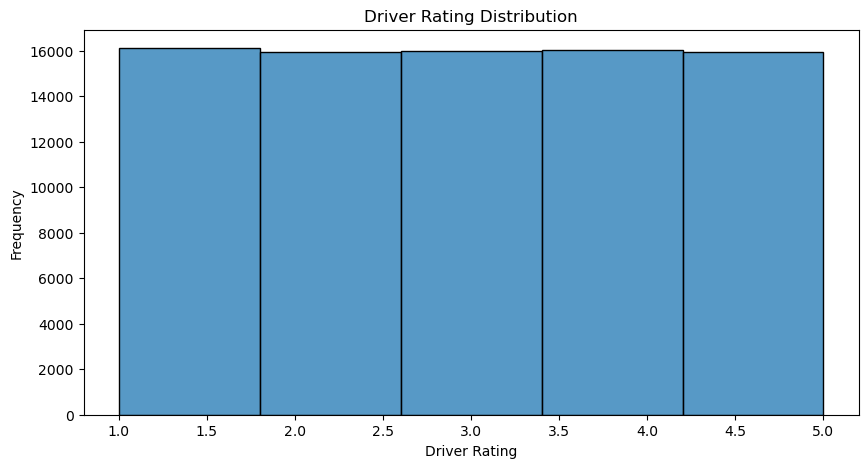

In [16]:
# 8. Driver rating distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['driver_rating'], bins=5, kde=False)
plt.title('Driver Rating Distribution')
plt.xlabel('Driver Rating')
plt.ylabel('Frequency')
plt.show()

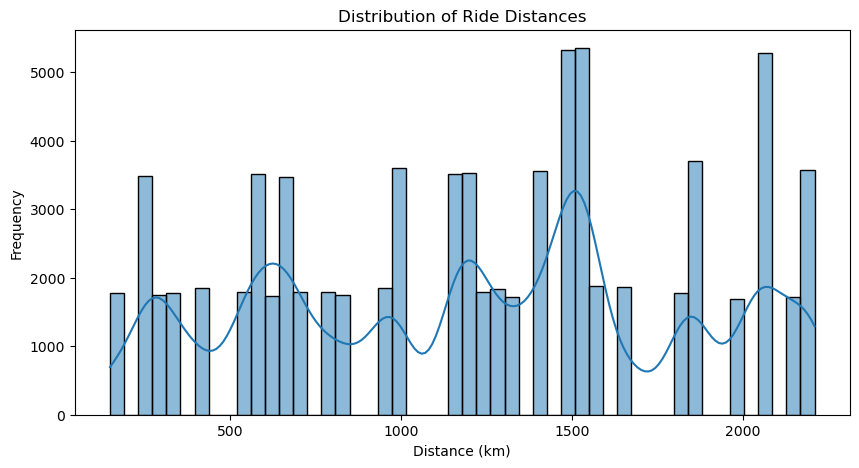

In [17]:
# 9. Distribution of ride distances
plt.figure(figsize=(10, 5))
sns.histplot(df['distance_km'], bins=50, kde=True)
plt.title('Distribution of Ride Distances')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

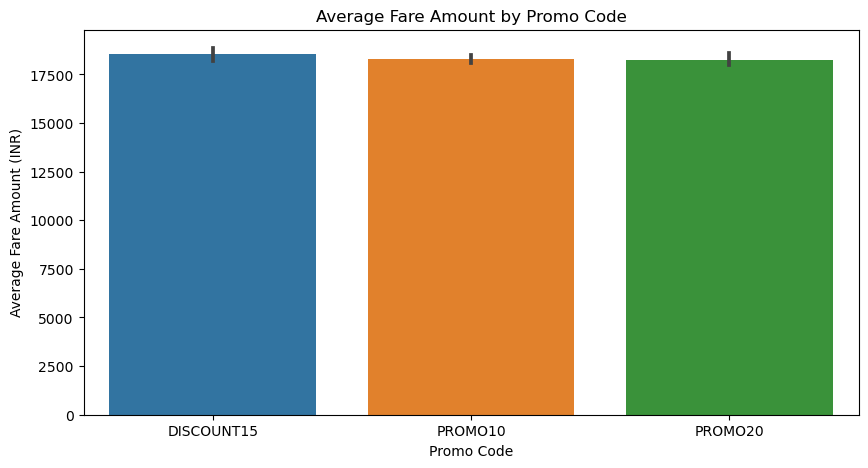

In [18]:
# 10. Average fare amount by promo code
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='promo_code', y='fare_amount')
plt.title('Average Fare Amount by Promo Code')
plt.xlabel('Promo Code')
plt.ylabel('Average Fare Amount (INR)')
plt.show()

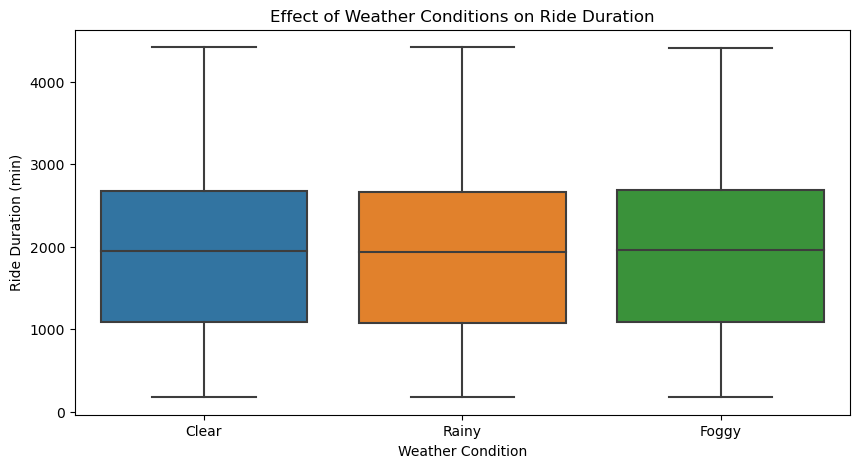

In [19]:
# 11. Effect of weather conditions on ride duration
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='weather_condition', y='ride_duration_min')
plt.title('Effect of Weather Conditions on Ride Duration')
plt.xlabel('Weather Condition')
plt.ylabel('Ride Duration (min)')
plt.show()

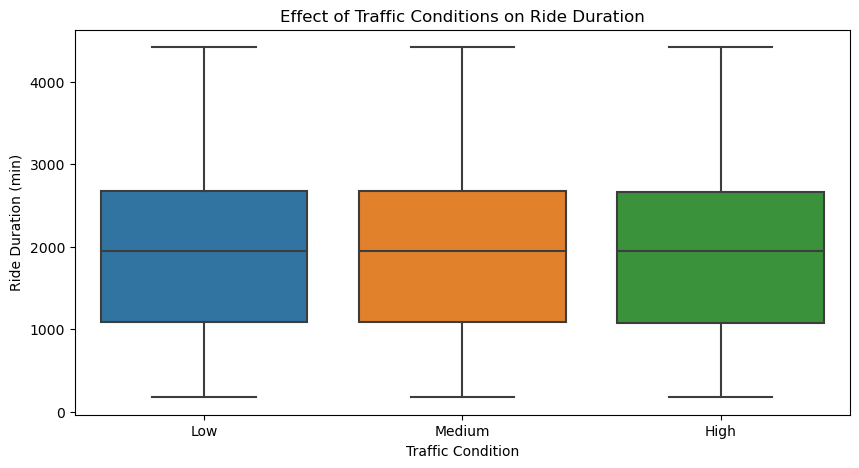

In [20]:
# 12. Effect of traffic conditions on ride duration
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='traffic_condition', y='ride_duration_min')
plt.title('Effect of Traffic Conditions on Ride Duration')
plt.xlabel('Traffic Condition')
plt.ylabel('Ride Duration (min)')
plt.show()

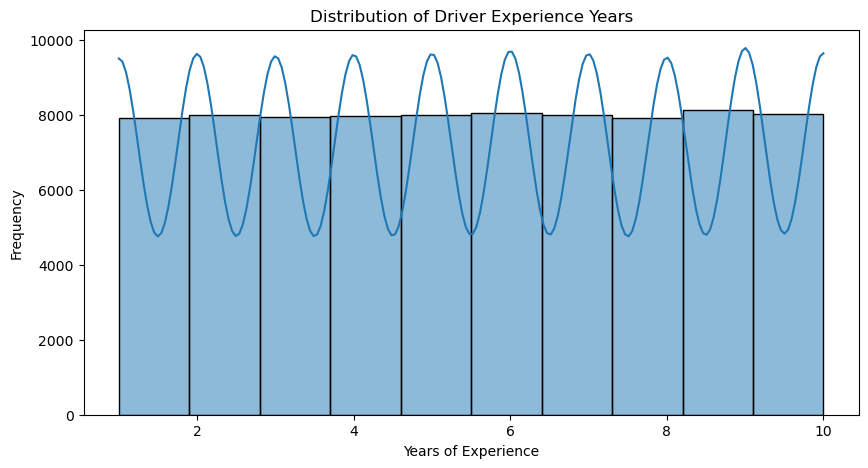

In [21]:
# 13. Distribution of driver experience years
plt.figure(figsize=(10, 5))
sns.histplot(df['driver_experience_years'], bins=10, kde=True)
plt.title('Distribution of Driver Experience Years')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

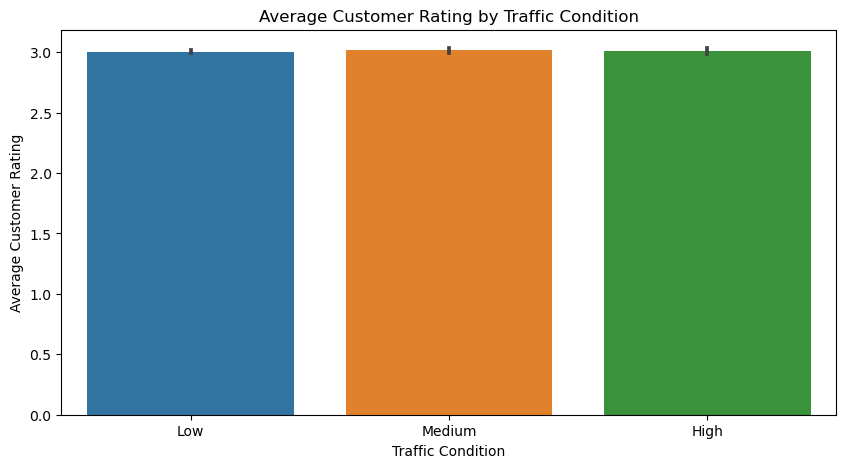

In [22]:
# 14. Average customer rating by traffic condition
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='traffic_condition', y='customer_rating')
plt.title('Average Customer Rating by Traffic Condition')
plt.xlabel('Traffic Condition')
plt.ylabel('Average Customer Rating')
plt.show()

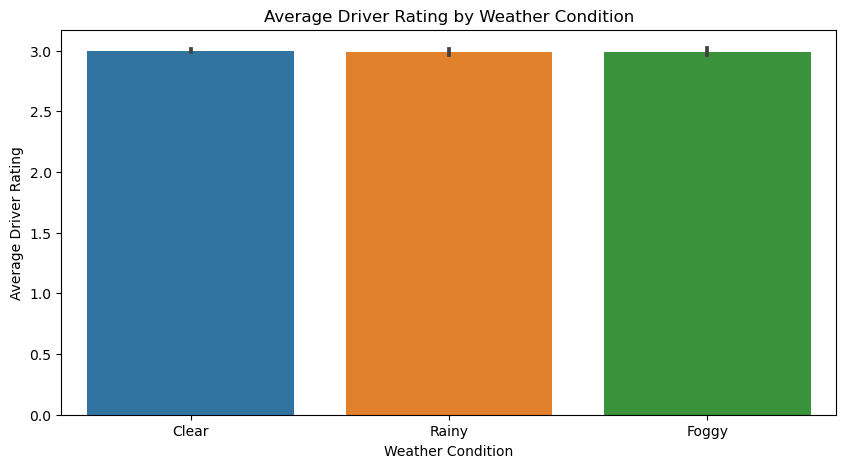

In [23]:
# 15. Average driver rating by weather condition
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='weather_condition', y='driver_rating')
plt.title('Average Driver Rating by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Driver Rating')
plt.show()

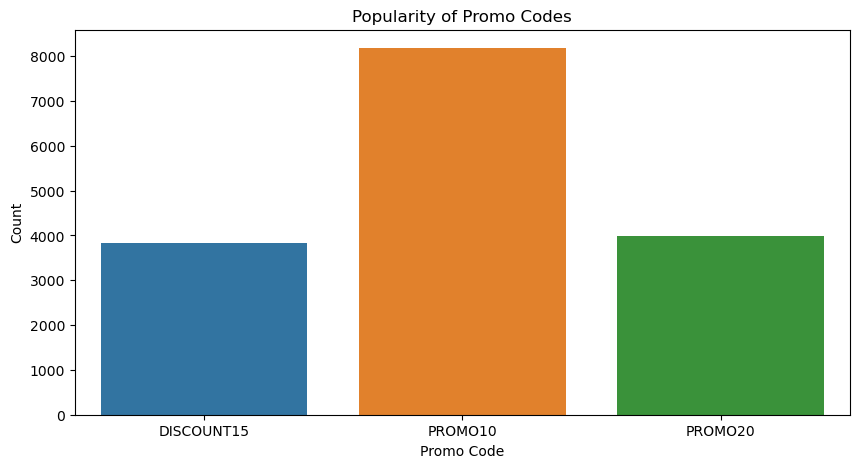

In [24]:
# 16. Popularity of promo codes
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='promo_code')
plt.title('Popularity of Promo Codes')
plt.xlabel('Promo Code')
plt.ylabel('Count')
plt.show()

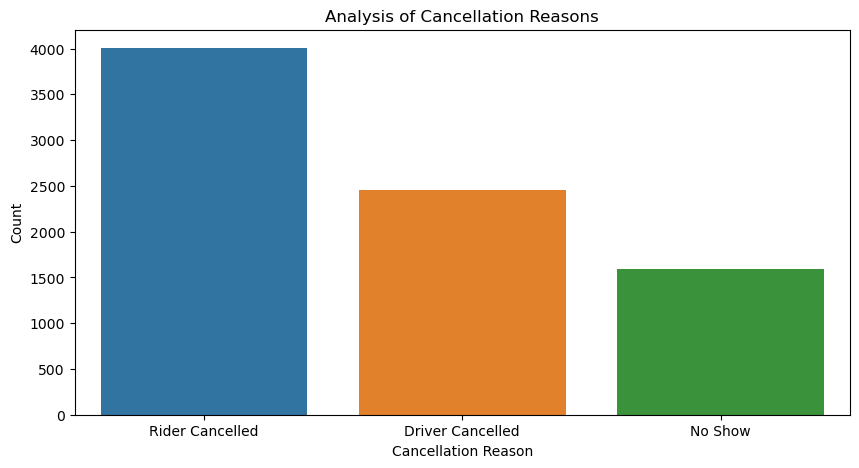

In [25]:
# 17. Analysis of cancellation reasons
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='cancellation_reason')
plt.title('Analysis of Cancellation Reasons')
plt.xlabel('Cancellation Reason')
plt.ylabel('Count')
plt.show()


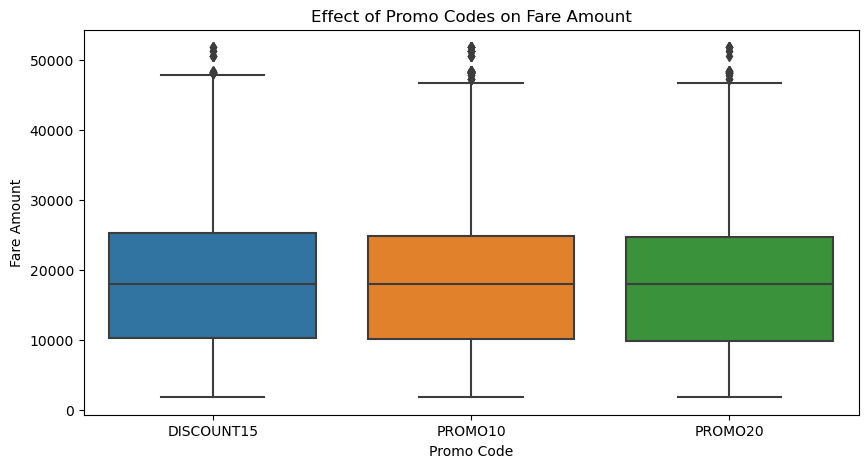

In [26]:
# 18. Effect of promo codes on fare amount
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='promo_code', y='fare_amount')
plt.title('Effect of Promo Codes on Fare Amount')
plt.xlabel('Promo Code')
plt.ylabel('Fare Amount')
plt.show()

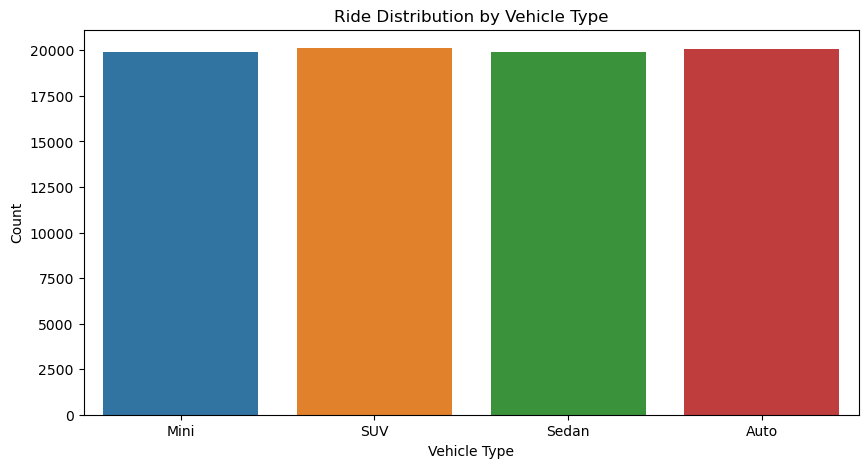

In [27]:
# 19. Ride distribution by vehicle type
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='vehicle_type')
plt.title('Ride Distribution by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

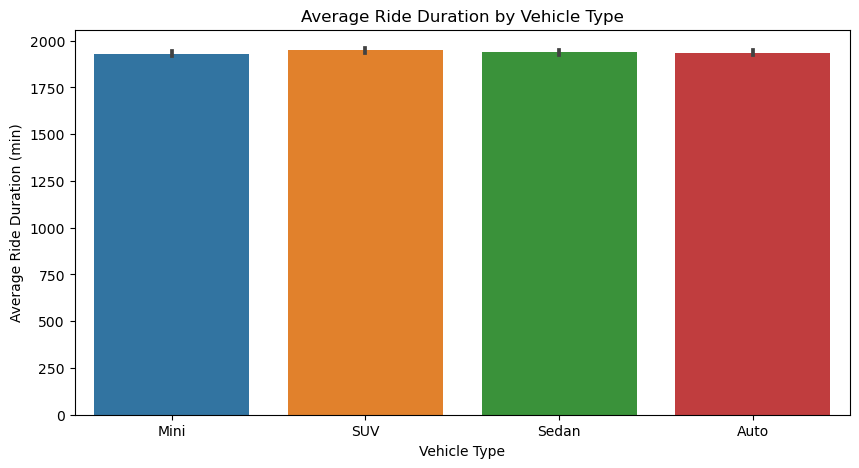

In [28]:
# 20. Average ride duration by vehicle type
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='vehicle_type', y='ride_duration_min')
plt.title('Average Ride Duration by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Ride Duration (min)')
plt.show()

C:\Users\sinha\AppData\Local\Temp\ipykernel_30420\6664723.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='driver_experience_years', y='customer_rating', ci=None)


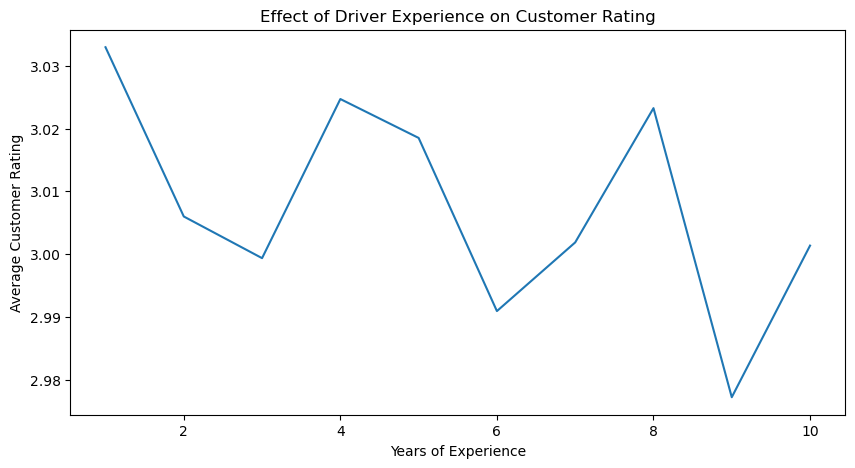

In [29]:
# 22. Effect of driver experience on customer rating
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='driver_experience_years', y='customer_rating', ci=None)
plt.title('Effect of Driver Experience on Customer Rating')
plt.xlabel('Years of Experience')
plt.ylabel('Average Customer Rating')
plt.show()

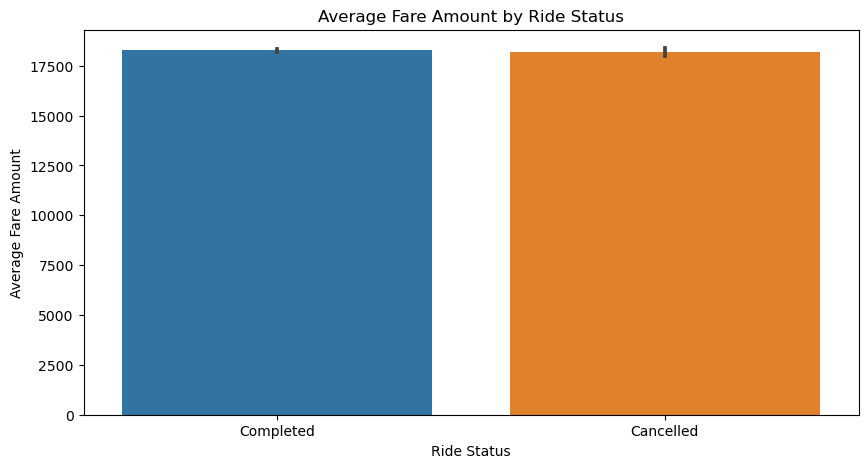

In [30]:
# 23. Average fare amount by ride status
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='ride_status', y='fare_amount')
plt.title('Average Fare Amount by Ride Status')
plt.xlabel('Ride Status')
plt.ylabel('Average Fare Amount')
plt.show()

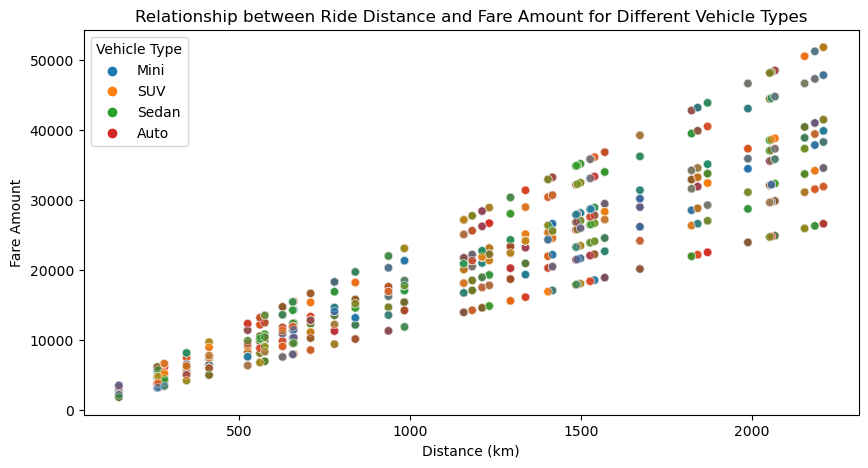

In [31]:
# 24. Relationship between ride distance and fare amount for different vehicle types
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='distance_km', y='fare_amount', hue='vehicle_type', alpha=0.5)
plt.title('Relationship between Ride Distance and Fare Amount for Different Vehicle Types')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount')
plt.legend(title='Vehicle Type')
plt.show()

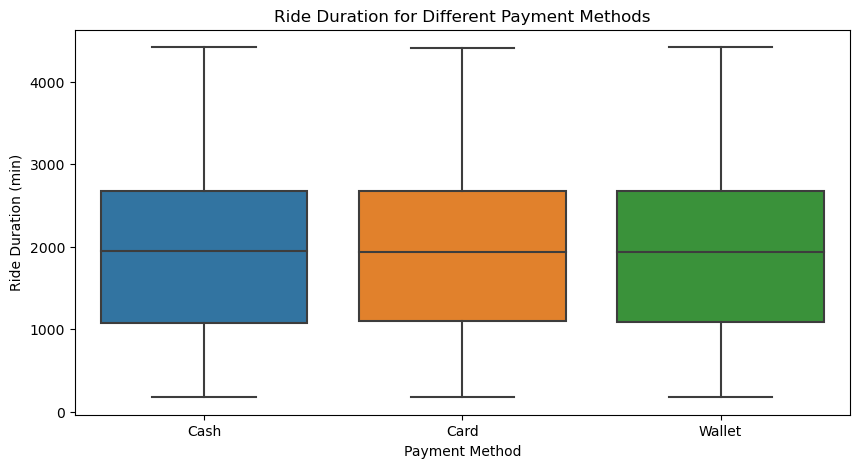

In [32]:
# 25. Analysis of ride duration for different payment methods
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='payment_method', y='ride_duration_min')
plt.title('Ride Duration for Different Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Ride Duration (min)')
plt.show()

## Statistical Analysis

In [34]:
# Descriptive statistics for numerical columns
numerical_stats = df.describe()
numerical_stats

,distance_km,ride_duration_min,fare_amount,customer_rating,driver_rating,driver_experience_years
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,1212.796850,1938.532817,18275.389302,3.007512,2.997187,5.512000
std,594.959589,999.671111,9842.541303,1.414392,1.415169,2.872274
min,148.000000,177.750000,1826.000000,1.000000,1.000000,1.000000
25%,660.000000,1087.172500,10130.000000,2.000000,2.000000,3.000000
50%,1232.000000,1944.185000,17930.000000,3.000000,3.000000,6.000000
75%,1570.000000,2673.582500,24866.000000,4.000000,4.000000,8.000000
max,2210.000000,4419.140000,51764.000000,5.000000,5.000000,10.000000


In [39]:
# Summary statistics for categorical columns
categorical_summary = df.describe(include=['object', 'category'])
categorical_summary

,ride_id,customer_id,driver_id,ride_time,pickup_location,dropoff_location,payment_method,cancellation_reason,ride_status,promo_code,vehicle_type,weather_condition,traffic_condition
count,80000,80000,80000,80000,80000,80000,80000,8044,80000,15988,80000,80000,80000
unique,80000,80000,80000,52190,10,10,3,3,2,3,4,3,3
top,R0000001,C00001,D00001,23:31:16,Surat,Bangalore,Card,Rider Cancelled,Completed,PROMO10,SUV,Clear,Low
freq,1,1,1,8,8268,8079,26850,4005,71956,8183,20125,55862,39934


In [42]:
# Average fare amount
average_fare = df['fare_amount'].mean()
print(f"Average Fare Amount: {average_fare:.2f} INR")

# Average distance
average_distance = df['distance_km'].mean()
print(f"Average Distance: {average_distance:.2f} km")

# Average ride duration
average_duration = df['ride_duration_min'].mean()
print(f"Average Ride Duration: {average_duration:.2f} minutes")

Average Fare Amount: 18275.39 INR
Average Distance: 1212.80 km
Average Ride Duration: 1938.53 minutes


In [43]:
# Average customer rating
average_customer_rating = df['customer_rating'].mean()
print(f"Average Customer Rating: {average_customer_rating:.2f}")

# Average driver rating
average_driver_rating = df['driver_rating'].mean()
print(f"Average Driver Rating: {average_driver_rating:.2f}")

Average Customer Rating: 3.01
Average Driver Rating: 3.00


In [44]:
# Average ride duration by traffic condition
average_duration_by_traffic = df.groupby('traffic_condition')['ride_duration_min'].mean()
print("Average Ride Duration by Traffic Condition:")
print(average_duration_by_traffic)

Average Ride Duration by Traffic Condition:
traffic_condition
High      1935.820976
Low       1938.523776
Medium    1940.292965
Name: ride_duration_min, dtype: float64


In [45]:
# Average ride duration by weather condition
average_duration_by_weather = df.groupby('weather_condition')['ride_duration_min'].mean()
print("Average Ride Duration by Weather Condition:")
print(average_duration_by_weather)

Average Ride Duration by Weather Condition:
weather_condition
Clear    1938.359198
Foggy    1949.375867
Rainy    1933.683768
Name: ride_duration_min, dtype: float64
